In [1]:
%matplotlib widget
import IGIMF3
import numpy as np
import pandas as pd

In [2]:
igimf3 = IGIMF3.IGIMF(0,0) # use only for the normalized functions

/Users/thecosmicweb/Documents/GitHub/IGIMF/_scratch/IGIMF3.py:111: RuntimeWarning: divide by zero encountered in log10
  return 8.16 * np.e**(-0.556 * np.log10(M_igal) + 3.401) + 0.027


In [3]:
resolution = 20
#resolution_2 = 10

In [4]:
Zsun = 0.0142
delta_alpha=63
delta_t = 1e7
Mecl_min = 5
Mecl_max = 5e9
m_star_max = 150
m_star_min = 0.08

In [5]:
M_igal_v = np.logspace(6, 11,num=resolution)
M_ecl_v = np.logspace(np.log10(Mecl_min), np.log10(Mecl_max), num=resolution)
#M_ecl_v = np.linspace((Mecl_min), (Mecl_max), num=resolution, endpoint=True)
mstar_v = np.logspace(np.log10(m_star_min), np.log10(m_star_max), num=resolution)
time_v = np.logspace(-3, 0.5, num=resolution)
Z_rel = lambda t: (-np.reciprocal(5*t) -1.5) # Analytic toy-model relation
Z_rel_v = np.array([Z_rel(t) for t in time_v])
#Z_v = np.power(10, Z_rel_v)
Z_v = np.logspace(-9,-1, num=resolution) # Metal mass fraction

In [6]:
def metallicity(metal_mass_fraction : float):
    return np.log10(metal_mass_fraction/Zsun)
#Z_sqr_v = np.array([metallicity(Z) for Z in Z_v])
Z_sqr_v = np.log10(np.divide(Z_v, Zsun))
print(Z_sqr_v)

[-7.15228834e+00 -6.73123571e+00 -6.31018308e+00 -5.88913045e+00
 -5.46807782e+00 -5.04702519e+00 -4.62597255e+00 -4.20491992e+00
 -3.78386729e+00 -3.36281466e+00 -2.94176203e+00 -2.52070940e+00
 -2.09965677e+00 -1.67860413e+00 -1.25755150e+00 -8.36498871e-01
 -4.15446239e-01  5.60639246e-03  4.26659024e-01  8.47711656e-01]


__Metallicity__

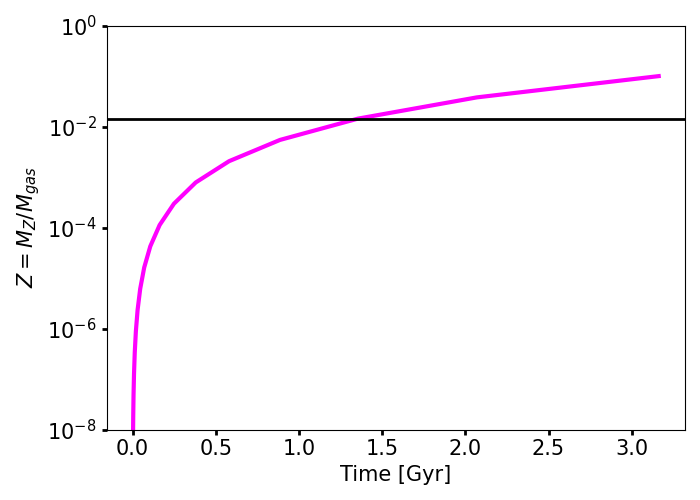

In [7]:
def Z_plot(time_v, Z_v):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.semilogy(time_v, Z_v, linewidth=3, color='magenta')
    ax.set_ylabel(r'$Z=M_Z/M_{gas}$', fontsize=15)
    ax.set_xlabel(f'Time [Gyr]', fontsize=15)
    ax.axhline(Zsun, color='black', linewidth=2)
    #plt.title(f'{M = :.2e} {Msun}', fontsize=15)
    ax.set_ylim(1e-8,1)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
Z_plot(time_v, Z_v)

__Gas density__

In [8]:
def rho_cl(M_ecl):
    return 10**(0.61 * np.log10(M_ecl) + 2.85)
rho_cl_v = np.array([rho_cl(M) for M in M_ecl_v]) 

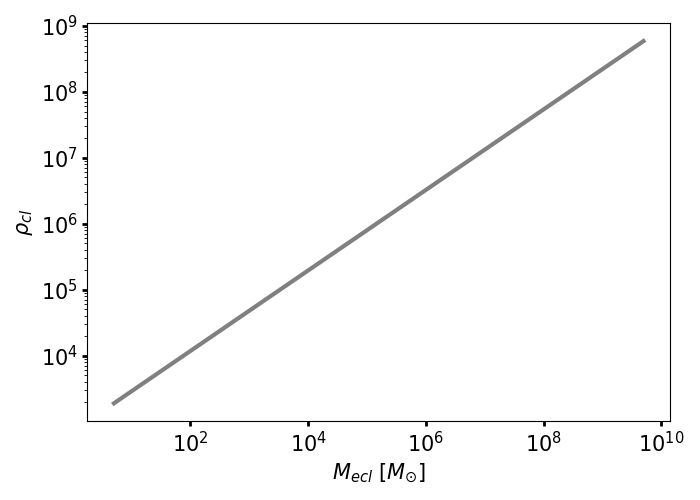

In [9]:
def rho_plot(M_ecl_v, rho_cl_v):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.loglog(M_ecl_v, rho_cl_v, linewidth=3, color='grey')
    ax.set_ylabel(r'$\rho_{cl}$', fontsize=15)
    ax.set_xlabel(r'$M_{ecl}$ '+f'[{Msun}]', fontsize=15)
    #plt.title(f'{M = :.2e} {Msun}', fontsize=15)
    #ax.set_ylim(1e-8,1)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
rho_plot(M_ecl_v, rho_cl_v)

__Stellar IMF__

In [10]:
def x_alpha_3_func(Z, rho_cl):
    
    #metallicity_val = np.log10(Z/Zsun)
    return (-0.14 * Z + 0.99 * np.log10(rho_cl/1e6))
x_func = np.vectorize(x_alpha_3_func)
#Z_mesh, rho_mesh = np.meshgrid(Z_v, rho_cl_v) # square bracket metallicity
#x_mesh = np.reshape([x_func(Z, rho) for Z in Z_v for rho in rho_cl_v], (len(Z_v), len(rho_cl_v)))
Z_mesh, rho_mesh = np.meshgrid(Z_sqr_v, rho_cl_v) # square bracket metallicity
x_mesh = x_func(Z_mesh, rho_mesh)

In [11]:
x_alpha_3_func(np.log10(0.01/Zsun),1e6)

0.021320368213627917

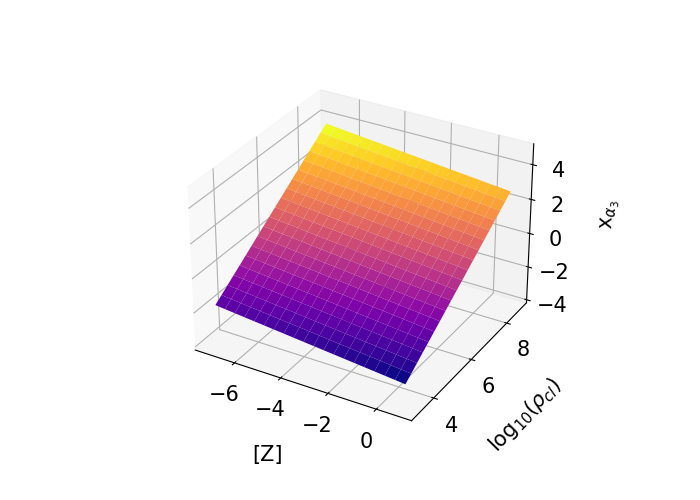

In [12]:
def x_plot():
    from matplotlib import pyplot as plt
    from mpl_toolkits import mplot3d
    import matplotlib.ticker as ticker
    fig = plt.figure(figsize=(7,5))
    ax = plt.axes(projection='3d')
    #ax.contour3D(Z_mesh, rho_mesh, x_mesh, 50, cmap='plasma')
    ax.plot_surface(Z_mesh, np.log10(rho_mesh), x_mesh, cmap='plasma')
    #ax.plot_surface(Z_sqr_v, rho_cl_v, x_mesh, 50, cmap='plasma')
    ax.set_xlabel('[Z]', fontsize=15, labelpad=15)
    ax.set_ylabel(r'$\log_{10}(\rho_{cl})$', fontsize=15, labelpad=15)
    ax.set_zlabel(r'x$_{\alpha_3}$', fontsize=15, labelpad=15)
    ax.tick_params(labelsize=15)
    ax.set_zlim(-4,5)
    plt.show(block=False)
x_plot()

In [13]:
def alpha_3_func(x_alpha_3):
    if x_alpha_3 < -0.87:
        return 2.3
    else:
        return -0.41 * x_alpha_3 + 1.94
xm_s1, xm_s2 = x_mesh.shape
alpha_3_mesh = np.asarray([[alpha_3_func(x_mesh[i,j]) for i in range(xm_s1)] for j in range(xm_s2)])
#alpha_3_mesh = np.reshape([[alpha_3_func(x_mesh[i,j]) for i in range(xm_s1)] for j in range(xm_s2)], x_mesh.shape)

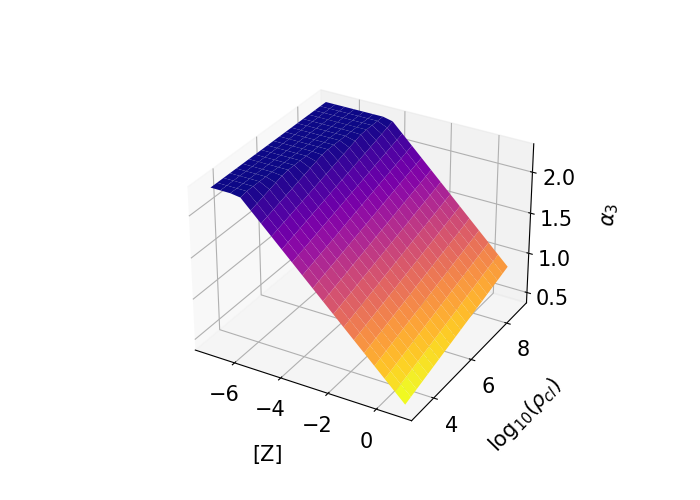

In [14]:
def alpha_3_plot():
    from matplotlib import pyplot as plt
    from mpl_toolkits import mplot3d
    import matplotlib.ticker as ticker
    fig = plt.figure(figsize=(7,5))
    ax = plt.axes(projection='3d')
    #ax.contour3D(Z_mesh, rho_mesh, x_mesh, 50, cmap='plasma')
    ax.plot_surface(Z_mesh, np.log10(rho_mesh), alpha_3_mesh, cmap='plasma_r')
    #ax.plot_surface(Z_sqr_v, rho_cl_v, x_mesh, 50, cmap='plasma')
    ax.set_xlabel('[Z]', fontsize=15, labelpad=15)
    ax.set_ylabel(r'$\log_{10}(\rho_{cl})$', fontsize=15, labelpad=15)
    ax.set_zlabel(r'${\alpha_3}$', fontsize=15, labelpad=15)
    #ax.set_zlim(-4,5)
    ax.tick_params(labelsize=15)
    plt.show(block=False)
alpha_3_plot()

In [15]:
def alpha_1_func(metal_mass_fraction):
    return 1.3 + delta_alpha * (metal_mass_fraction - Zsun) 
def alpha_2_func(alpha_1):
    return 1 + alpha_1
alpha_1_v = np.array([alpha_1_func(Z) for Z in Z_v]) # Z in metal mass fraction
alpha_2_v = np.array([alpha_2_func(alpha1) for alpha1 in alpha_1_v])

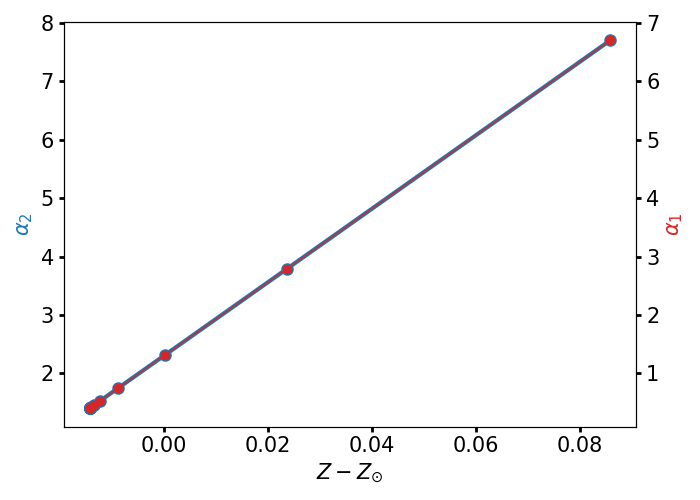

In [16]:
def alpha12_plot(Z_v, alpha_1, alpha_2):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax1 = plt.subplots(1,1, figsize=(7,5))
    ax0 = ax1.twinx()
    ax0.scatter(Z_v - Zsun, alpha_1, linewidth=1, color='tab:red')
    ax0.plot(Z_v - Zsun, alpha_1, linewidth=1, color='tab:red')
    ax0.set_ylabel(r'$\alpha_1$', fontsize=15, color='tab:red')
    ax0.set_xlabel(r'$Z=M_Z/M_{gas}$', fontsize=15)
    ax1.scatter(Z_v - Zsun, alpha_2, linewidth=3, color='tab:blue')
    ax1.plot(Z_v - Zsun, alpha_2, linewidth=3, color='tab:blue')
    ax1.set_ylabel(r'$\alpha_2$', fontsize=15, color='tab:blue')
    ax1.set_xlabel(r'$Z-Z_{\odot}$', fontsize=15)
    #ax.set_ylim(1e-8,1)
    ax0.tick_params(width=2, axis='both', labelsize=15)
    ax1.tick_params(width=2, axis='both', labelsize=15)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
alpha12_plot(Z_v, alpha_1_v, alpha_2_v)

In [17]:
def initial_mass_function(m, Z, alpha_3=None, m_max=None):
    alpha_1 = alpha_1_func(Z)
    alpha_2 = alpha_2_func(alpha_1)
    if np.logical_and(m>=m_star_min, m<0.5):
        return m**(-alpha_1) * 2
    elif np.logical_and(m>=0.5, m<1.):
        return m**(-alpha_2)
    elif m>=1.:
        return igimf3.normalized(m, m**(-alpha_3), condition=m_max)
    else:
        return 0.
    
def stellar_IMF(M_ecl, Z):
    rho_cl_val = rho_cl(M_ecl)
    x_alpha_3 = x_func(Z, rho_cl_val)
    alpha_3 = alpha_3_func(x_alpha_3)
    k_star, m_max = igimf3.normalization(initial_mass_function, M_ecl, 
                                           m_star_min, m_star_max, Z, alpha_3)
    IMF_weighted_func = lambda m: m * k_star * initial_mass_function(m, Z, alpha_3=alpha_3, m_max=m_max)
    IMF_func = lambda m: k_star * initial_mass_function(m, Z, alpha_3=alpha_3, m_max=m_max)
    return k_star, m_max, IMF_func, IMF_weighted_func, alpha_3

In [18]:
sIMF_val = [stellar_IMF(Mecl, Z) for Z in Z_sqr_v for Mecl in M_ecl_v]
sIMF_functions = []
for i,val in enumerate(sIMF_val):
    sIMF_functions.append(val[2])

In [19]:
M_ecl_v_mesh, Z_sqr_mesh = np.meshgrid(M_ecl_v, Z_sqr_v) # square bracket metallicity
sIMF = np.reshape(sIMF_functions, (len(Z_sqr_v), len(M_ecl_v)))

In [20]:
[sIMF_functions[41](m) for m in mstar_v] == [sIMF[2,1](m) for m in mstar_v] 

True

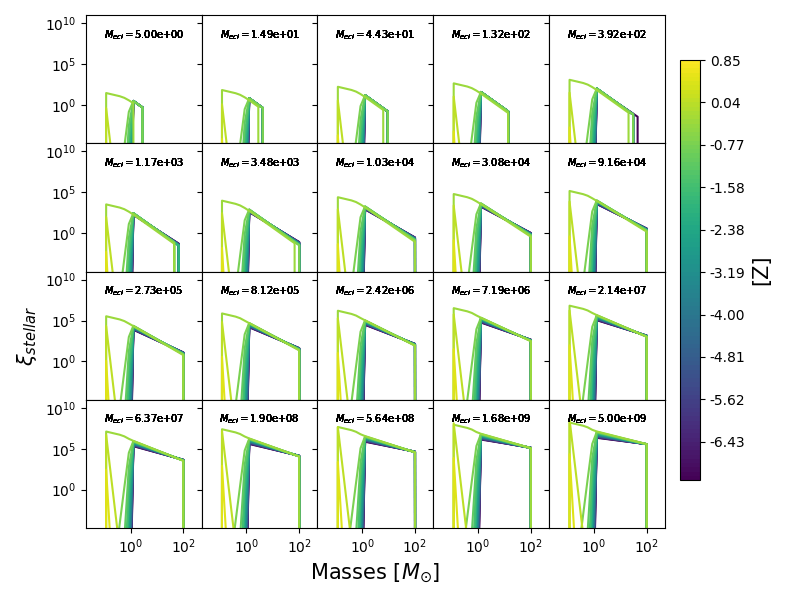

In [21]:
def sIMF_subplot():
    import matplotlib.pyplot as plt 
    import itertools
    from mpl_toolkits import mplot3d
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    cm = plt.cm.get_cmap(name='viridis')
    levels = np.linspace(Z_sqr_v[0], Z_sqr_v[-1], 100, endpoint=True)
    CS3 = plt.contourf([[0,0],[0,0]], levels, cmap=cm)
    plt.clf()
    num_colors=20
    currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    currentColor = itertools.cycle(currentColors)
    fig, axs = plt.subplots(4, 5, figsize=(8,6))
    for i, ax in enumerate(axs.flat):
        for j, Z in enumerate(Z_sqr_mesh):
            ax.annotate(r'$M_{ecl}=$%.2e'%(M_ecl_v[i]), xy=(0.5, 0.9), xycoords='axes fraction', horizontalalignment='center', verticalalignment='top', fontsize=7, alpha=0.7)
            ax.loglog(mstar_v, [sIMF[j,i](m) for m in mstar_v], color=next(currentColor))
            ax.set_ylim(2e-5,1e11)
            ax.set_xlim(2e-2,5e2)
    for nr in range(4):
        for nc in range(5):
            if nc != 0:
                axs[nr,nc].set_yticklabels([])
            if nr != 4-1:
                axs[nr,nc].set_xticklabels([])
    axs[4//2,0].set_ylabel(r'$\xi_{stellar}$', fontsize = 15)
    axs[4-1, 5//2].set_xlabel(r'Masses [$M_{\odot}$]', fontsize = 15)
    #divider = make_axes_locatable(axs.flat[-1])
    plt.subplots_adjust(bottom=0., right=0.95, top=1.)
    cax = plt.axes([0.85, 0.2, 0.025, 0.7])#divider.append_axes("right", size="5%", pad="2%")
    cbar = plt.colorbar(CS3, cmap=cm, cax=cax, format="%.2f").set_label(label=r'[Z]',size=15)
    fig.tight_layout(rect=[0,0,0.85,1])
    fig.subplots_adjust(wspace=0., hspace=0.)
    fig.savefig('stellarIMF_subplots.pdf')
sIMF_subplot()

__SFR and downsizing time__

In [22]:
def delta_tau(M_igal):
    return 8.16 * np.e**(-0.556 * np.log10(M_igal) + 3.401) + 0.027
def SFR_func(M_igal):
    downsizing_time = delta_tau(M_igal)
    return np.divide(M_igal, downsizing_time * 1e9), downsizing_time
val = np.array([SFR_func(Migal) for Migal in M_igal_v])
SFR = val[:,0]
downsizing_time = val[:,1]

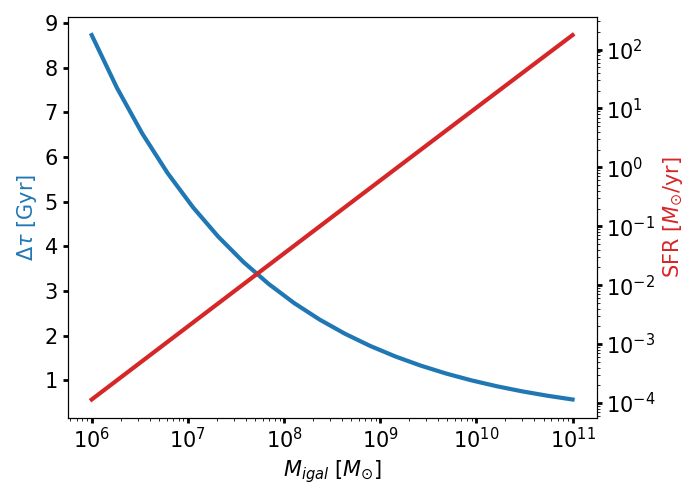

In [23]:
def Migal_plot(M_igal_v, SFR, downsizing_time):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax1 = plt.subplots(1,1, figsize=(7,5))
    ax0 = ax1.twinx()
    ax0.loglog(M_igal_v, SFR, linewidth=3, color='tab:red')
    ax0.set_ylabel(f'SFR [{Msun}/yr]', fontsize=15, color='tab:red')
    ax0.set_xlabel(r'$M_{igal}$ '+f'[{Msun}]', fontsize=15)
    ax1.semilogx(M_igal_v, downsizing_time, linewidth=3, color='tab:blue')
    ax1.set_ylabel(r'$\Delta\tau$ [Gyr]', fontsize=15, color='tab:blue')
    ax1.set_xlabel(r'$M_{igal}$ '+f'[{Msun}]', fontsize=15)
    #ax.set_ylim(1e-8,1)
    ax0.tick_params(width=2, axis='both', labelsize=15)
    ax1.tick_params(width=2, axis='both', labelsize=15)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
Migal_plot(M_igal_v, SFR, downsizing_time)

__Embedded cluster mass function__

In [24]:
def beta_func(SFR_in_delta_t):
    return -0.106 * np.log10(SFR_in_delta_t) + 2
beta_ECMF = [beta_func(s) for s in SFR]

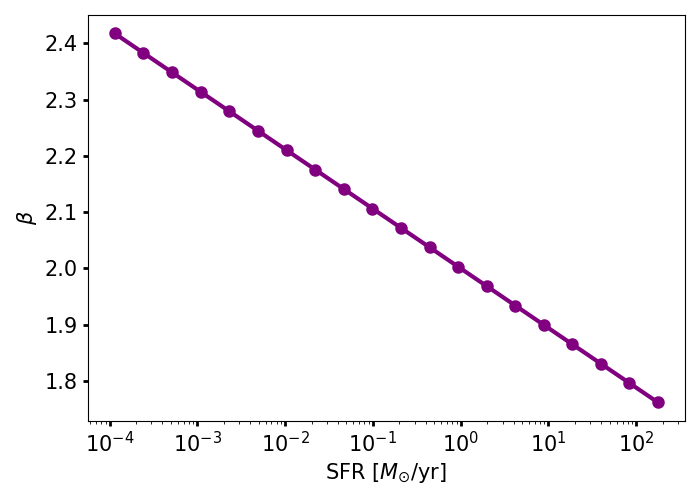

In [25]:
def beta_plot(SFR, beta_ECMF):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.semilogx(SFR, beta_ECMF, linewidth=3, color='purple')
    ax.scatter(SFR, beta_ECMF, linewidth=3, color='purple')
    ax.set_ylabel(r'$\beta$', fontsize=15)
    ax.set_xlabel(f'SFR [{Msun}/yr]', fontsize=15)
    #plt.title(f'{M = :.2e} {Msun}', fontsize=15)
    #ax.set_ylim(1e-8,1)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
beta_plot(SFR, beta_ECMF)

In [26]:
def embedded_cluster_mass_function(M_ecl, SFR_delta_t, M_max=None):
    r"""Eq. (8)"""
    if M_ecl>=Mecl_min:
        return igimf3.normalized(M_ecl, M_ecl**(-beta_func(SFR_delta_t)), condition=M_max)
    else:
        return 0.
        
def ECMF(SFR_delta_t):
    '''duplicate of stellar_IMF !!!!!!! '''
    k_ecl, M_max = igimf3.normalization(embedded_cluster_mass_function,
                                      SFR_delta_t * delta_t, Mecl_min, Mecl_max, SFR_delta_t,)
    ECMF_func = lambda M_ecl: k_ecl * embedded_cluster_mass_function(M_ecl, SFR_delta_t, M_max=M_max)
    ECMF_weighted_func = lambda M_ecl: igimf3.weighted_func(M_ecl, ECMF_func)
    return k_ecl, M_max, ECMF_func, ECMF_weighted_func

In [27]:
ECMF_val = [ECMF(S) for S in SFR]
ECMF_functions = []
for i,val in enumerate(ECMF_val):
    ECMF_functions.append(val[2])

In [28]:
ECMF_mesh = []
for ECMF_f in ECMF_functions:
    ECMF_mesh.append([ECMF_f(M) for M in M_ecl_v])

In [29]:
SFR_mesh, M_ecl_v_mesh = np.meshgrid(SFR, M_ecl_v)
ECMF_mesh_reshape = np.reshape(ECMF_mesh, (len(ECMF_functions), len(M_ecl_v)))

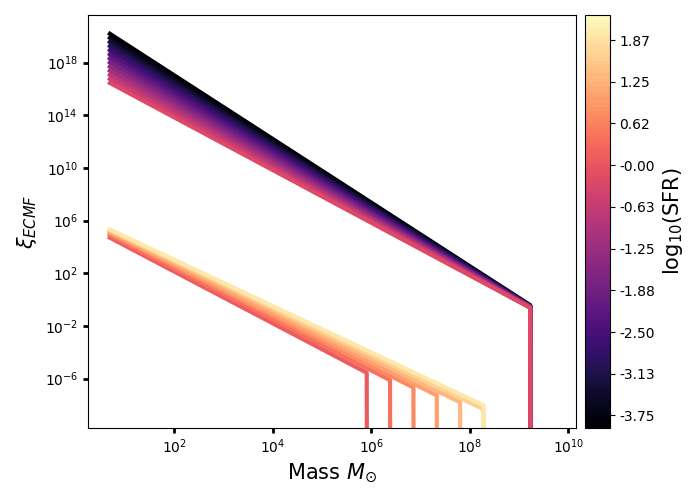

In [30]:
def ECMF_plots(M_ecl_v, ECMF_mesh):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    Msun = r'$M_{\odot}$'
    cm = plt.cm.get_cmap(name='magma')
    num_colors = len(ECMF_mesh)
    Z = [[0,0],[0,0]]
    levels = np.linspace(np.log10(SFR[0]), np.log10(SFR[-1]), 100, endpoint=True)
    CS3 = plt.contourf(Z, levels, cmap=cm)
    plt.clf()
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    SFR_colormap = (SFR)#np.log10(np.logspace(np.log10(SFR[0]), np.log10(SFR[-1]), 10, endpoint=True))
    currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    currentColor = iter(currentColors)
    #dummy_cax = ax.scatter(M_ecl_v,ECMF_mesh[19], linewidth=3, vmin=SFR_colormap[0], vmax=SFR_colormap[-1], c=np.log10(SFR), cmap=cm, alpha=1)
    for i,ECMF in enumerate(ECMF_mesh):
        ax.loglog(M_ecl_v,ECMF, linewidth=3, c=next(currentColor))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="2%")
    ax.set_ylabel(r'$\xi_{ECMF}$', fontsize=15)
    ax.set_xlabel(f'Mass {Msun}', fontsize=15)
    ax.tick_params(width=2)
    cbar = fig.colorbar(CS3, cmap=cm, cax=cax, format="%.2f").set_label(label=r'$\log_{10}({\rm SFR})$',size=15)
    fig.tight_layout()
    plt.savefig(f'ECMF_plots.pdf', bbox_inches='tight')
    #plt.show(block=False)
    return None
ECMF_plots(M_ecl_v, ECMF_mesh)

In [31]:
def get_ECMF_mesh_reshape(SFRval, M_ecl_v_val):
    '''Not efficient but flexible'''
    val = ECMF(SFRval)
    return val[2](M_ecl_v_val)
ECMF_mesh_vectorize = np.vectorize(get_ECMF_mesh_reshape)

In [32]:
#ECMF_mesh_revec = ECMF_mesh_vectorize(SFR_mesh, M_ecl_v_mesh)
import pickle
#pickle.dump(ECMF_mesh_revec,open('./ECMF_mesh_revec.pkl','wb'))
ECMF_mesh_revec = pickle.load(open('./ECMF_mesh_revec.pkl','rb'))

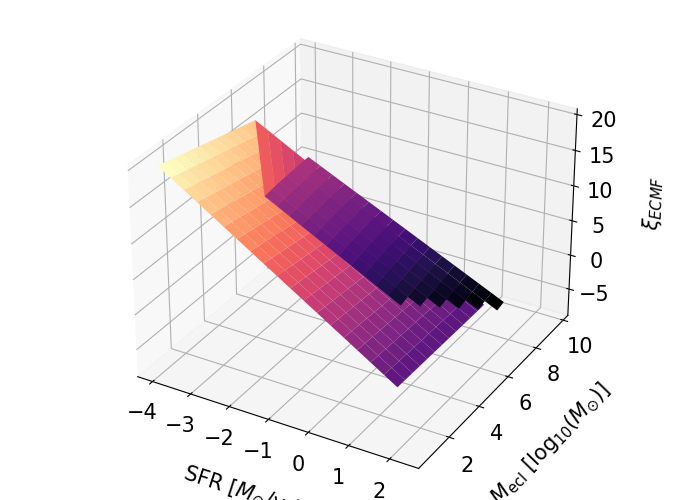

In [33]:
def ECMF_3D_plot():
    from matplotlib import pyplot as plt
    from mpl_toolkits import mplot3d
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig = plt.figure(figsize=(7,5))
    #ax = plt.axes(projection='3d')
    ax = Axes3D(fig)
    ax.plot_surface(np.log10(SFR_mesh), np.log10(M_ecl_v_mesh), np.log10(ECMF_mesh_reshape), cmap='magma')
    #ax.plot_surface(Z_sqr_v, rho_cl_v, x_mesh, 50, cmap='plasma')
    ax.set_ylabel(r'$M_{\rm ecl}$ [$\log_{10}(M_{\odot})$]', fontsize=15, labelpad=15)
    ax.set_xlabel(f'SFR [{Msun}/yr]', fontsize=15, labelpad=15)
    ax.set_zlabel(r'$\xi_{ECMF}$', fontsize=15, labelpad=15)
    #ax.set_zlim(-4,5)
    ax.tick_params(labelsize=15)
    plt.show()
ECMF_3D_plot()

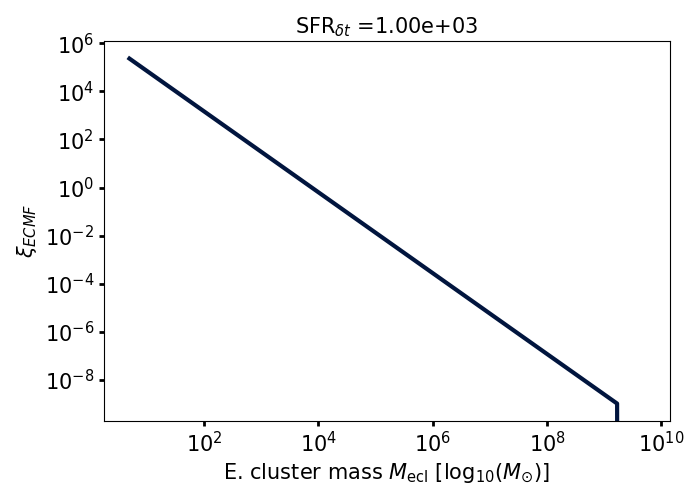

In [34]:
SFR_delta_t_val = 1e3
k_ecl1, M_max1, ECMF_func1, ECMF_weighted_func1 = ECMF(SFR_delta_t_val)
ECMF_v = np.array([ECMF_func1(M) for M in M_ecl_v])
def ECMF_plot(M_ecl_v, ECMF_v):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    ax.loglog(M_ecl_v, ECMF_v, linewidth=3, color='#01153E')
    ax.set_ylabel(r'$\xi_{ECMF}$', fontsize=15)
    ax.set_xlabel(r'E. cluster mass $M_{\rm ecl}$ [$\log_{10}(M_{\odot})$]', fontsize=15)
    #plt.title(f'{M = :.2e} {Msun}', fontsize=15)
    #ax.set_ylim(1e-8,1)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(r'SFR$_{\delta t}$ =%.2e'%(SFR_delta_t_val), fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
    return None
ECMF_plot(M_ecl_v, ECMF_v)